In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Text(0, 0.5, 'Y dataset')

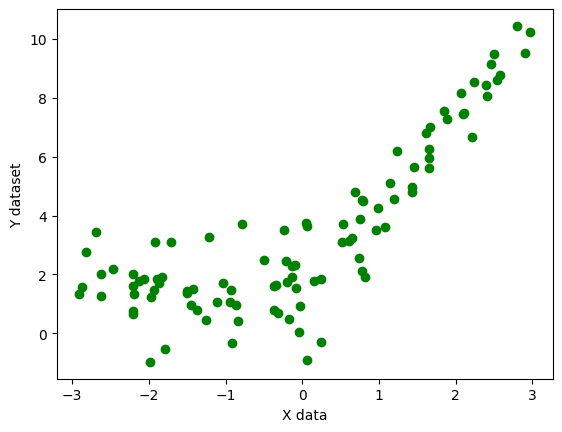

In [3]:
X = 6 * np.random.rand(100,1) - 3
y =0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)

plt.scatter(X,y,color='g')
plt.xlabel('X data')
plt.ylabel('Y dataset')

In [4]:
from sklearn.model_selection import train_test_split


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
##implement simple linear regression

from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()

In [8]:
regression1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test,regression1.predict(X_test))

In [10]:
print(sscore)

0.5664240802252483


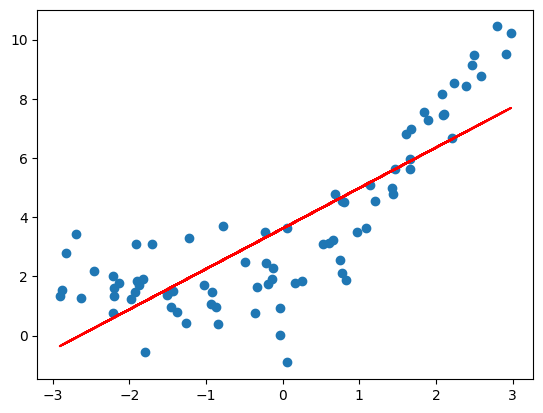

In [11]:
##visualize this model

plt.plot(X_train,regression1.predict(X_train),color ='r')
plt.scatter(X_train,y_train)


In [12]:
##lets apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures 

In [13]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
X_train_poly

array([[ 1.00000000e+00, -3.65401799e-01,  1.33518474e-01],
       [ 1.00000000e+00,  1.43113353e+00,  2.04814319e+00],
       [ 1.00000000e+00, -9.40089923e-01,  8.83769063e-01],
       [ 1.00000000e+00,  2.09088767e+00,  4.37181125e+00],
       [ 1.00000000e+00, -2.62456578e+00,  6.88834555e+00],
       [ 1.00000000e+00, -1.97171747e-01,  3.88766979e-02],
       [ 1.00000000e+00, -1.31996792e-01,  1.74231532e-02],
       [ 1.00000000e+00,  1.20255840e+00,  1.44614671e+00],
       [ 1.00000000e+00,  7.78783561e-01,  6.06503835e-01],
       [ 1.00000000e+00,  6.06118481e-01,  3.67379613e-01],
       [ 1.00000000e+00, -1.70609119e+00,  2.91074713e+00],
       [ 1.00000000e+00,  2.97576590e+00,  8.85518271e+00],
       [ 1.00000000e+00, -1.79194901e+00,  3.21108127e+00],
       [ 1.00000000e+00, -3.35663387e-01,  1.12669910e-01],
       [ 1.00000000e+00, -1.42557047e+00,  2.03225117e+00],
       [ 1.00000000e+00, -2.20025975e+00,  4.84114298e+00],
       [ 1.00000000e+00,  1.67158650e+00

In [15]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.8116844385626216


In [16]:
print(regression.coef_)

[[0.         1.38449162 0.51785658]]


In [17]:
print(regression.intercept_)

[2.18060901]


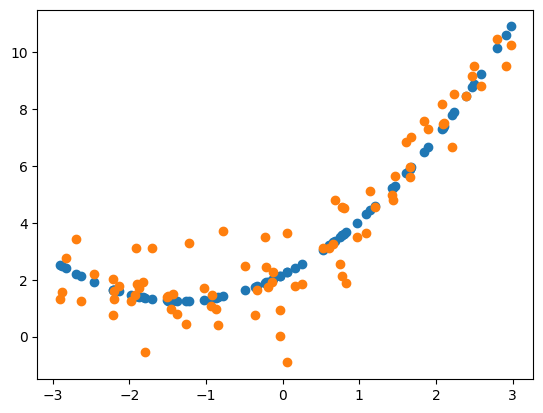

In [19]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [20]:
##prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly =  poly.transform(X_new)

In [21]:
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

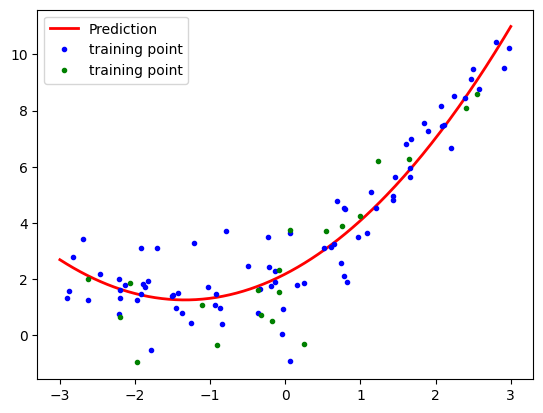

In [22]:
y_new = regression.predict(x_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.plot(X_train,y_train,"b.",label='training point')
plt.plot(X_test,y_test,"g.",label='training point')
plt.legend()
plt.show()

Pipeline COncept
==


In [23]:
from sklearn.pipeline import Pipeline

In [27]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("Poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])

    poly_regression.fit(X_train,y_train)  #3polynomial and fit linear regression
    y_pred_new = poly_regression.predict(X_new)

    ##plotting preditcion line

    plt.plot(X_new,y_pred_new,'r',label="Degree" + str (degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",linewidth =3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()


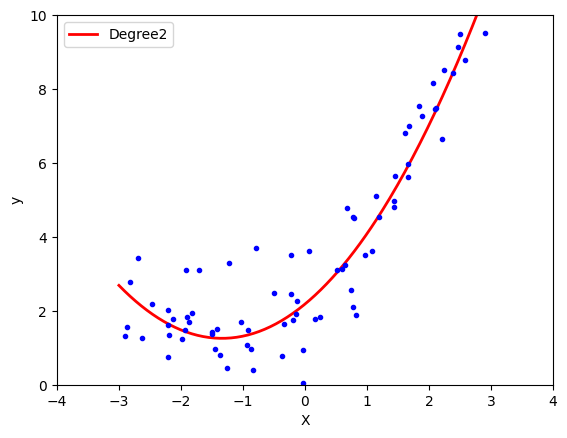

In [30]:
poly_regression(2)